In [ ]:
import gudhi as gd
import numpy as np
import matplotlib.pyplot as plt

: 

In [3]:
def plot_ctree(point_cloud, ctree, filtration_th, axs, xlim = [600, 950], ylim = [800, 400], circles = True):
    axs.scatter(point_cloud[:, 0], point_cloud[:, 1])

    for i in range(point_cloud.shape[0]):
        axs.annotate(i, (point_cloud[i, 0], point_cloud[i, 1]), fontsize=17)

    for simplex in ctree.get_filtration():
        if len(simplex[0]) == 2:
            axs.plot(point_cloud[simplex[0], 0], point_cloud[simplex[0], 1], 'k-')
        elif len(simplex[0]) == 3:
            axs.fill(point_cloud[simplex[0], 0], point_cloud[simplex[0], 1], 'blue', alpha=0.2)

    if circles:
        for i in range(point_cloud.shape[0]):
            circle = plt.Circle((point_cloud[i, 0], point_cloud[i, 1]), filtration_th, color='grey', alpha=0.2)
            axs.add_artist(circle)
    axs.invert_yaxis()
    axs.set_xlim(xlim)
    axs.set_ylim(ylim)


    return axs

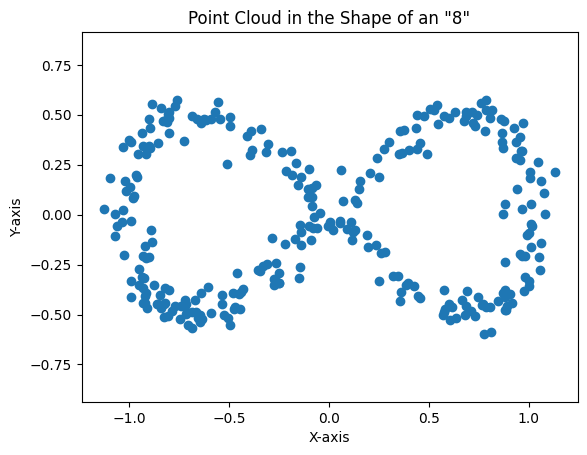

In [4]:
# Number of points
num_points = 300

# Parametric equation for the infinity symbol (8)
t = np.linspace(0, 2-5*np.pi, num_points)
x = np.sin(t)
y = np.sin(t)*np.cos(t)

# Add some random noise to the points
noise_factor = 0.05
x += np.random.normal(0, noise_factor, num_points)
y += np.random.normal(0, noise_factor, num_points)

# Plot the point cloud in the shape of an 8
plt.scatter(x, y, marker='o')
plt.title('Point Cloud in the Shape of an "8"')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axis('equal')  # Equal scaling for x and y axes
plt.show()

In [5]:
point_cloud = np.column_stack((x, y))

alpha_complex = gd.AlphaComplex(points=point_cloud)
simplex_tree = alpha_complex.create_simplex_tree()

# Compute the persistence diagram of the alpha complex
persistence_diagram = simplex_tree.persistence()




/Users/astaburhenne/Desktop/TDA/tdaenv/lib/python3.10/site-packages/gudhi/persistence_graphical_tools.py:105: UserWarning: This function is not available.
ModuleNotFoundError: No module named 'matplotlib'.
  warnings.warn(f"This function is not available.\nModuleNotFoundError: No module named '{import_error.name}'.")


<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

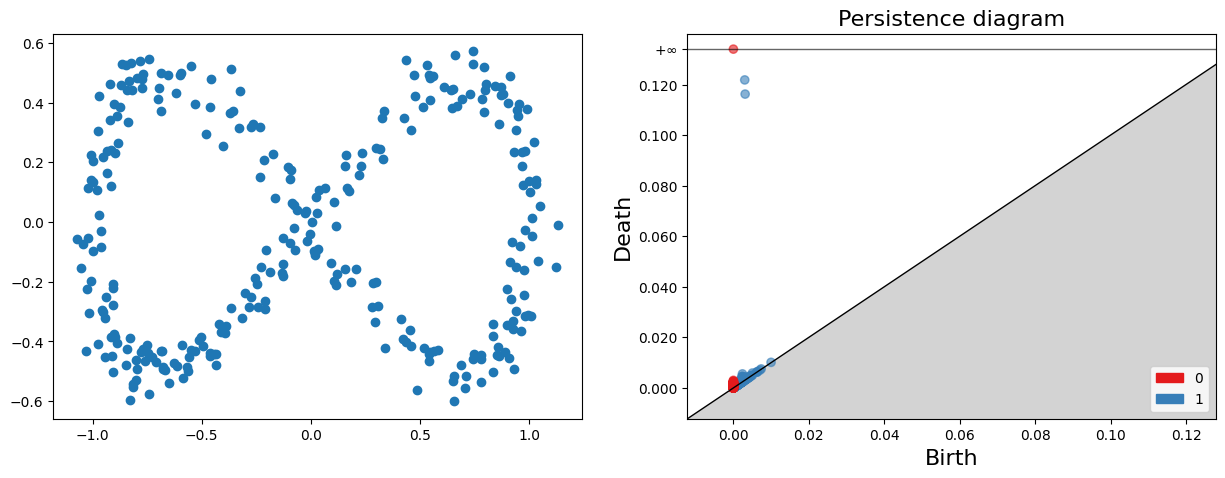

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

t = np.linspace(0, 2-5*np.pi, num_points)
x = np.sin(t)
y = np.sin(t)*np.cos(t)

# Add some random noise to the points
noise_factor = 0.05
x += np.random.normal(0, noise_factor, num_points)
y += np.random.normal(0, noise_factor, num_points)

point_cloud = np.column_stack((x, y))
alpha_complex = gd.AlphaComplex(points=point_cloud)
simplex_tree = alpha_complex.create_simplex_tree()  
dgm0 = simplex_tree.persistence()
ax[0].scatter(x, y)
gd.plot_persistence_diagram(dgm0, legend=True, axes=ax[1])

In [7]:
def bottleneck_distance(dgm1, dgm2):
    dgm1t = np.array([np.array(t[1]) for t in dgm1])
    dgm2t = np.array([np.array(t[1]) for t in dgm2])

    return gd.bottleneck_distance(dgm1t, dgm2t)

In [8]:
def wasserstein_distance(dgm1, dgm2):
    dgm1t = np.array([np.array(t[1]) for t in dgm1])
    dgm2t = np.array([np.array(t[1]) for t in dgm2])

    return gd.wasserstein_distance(dgm1t, dgm2t, internal_p=2, order=2)

0.01689514153709544
0.006453757201972221
0.0048266903096367
0.022376863491640767


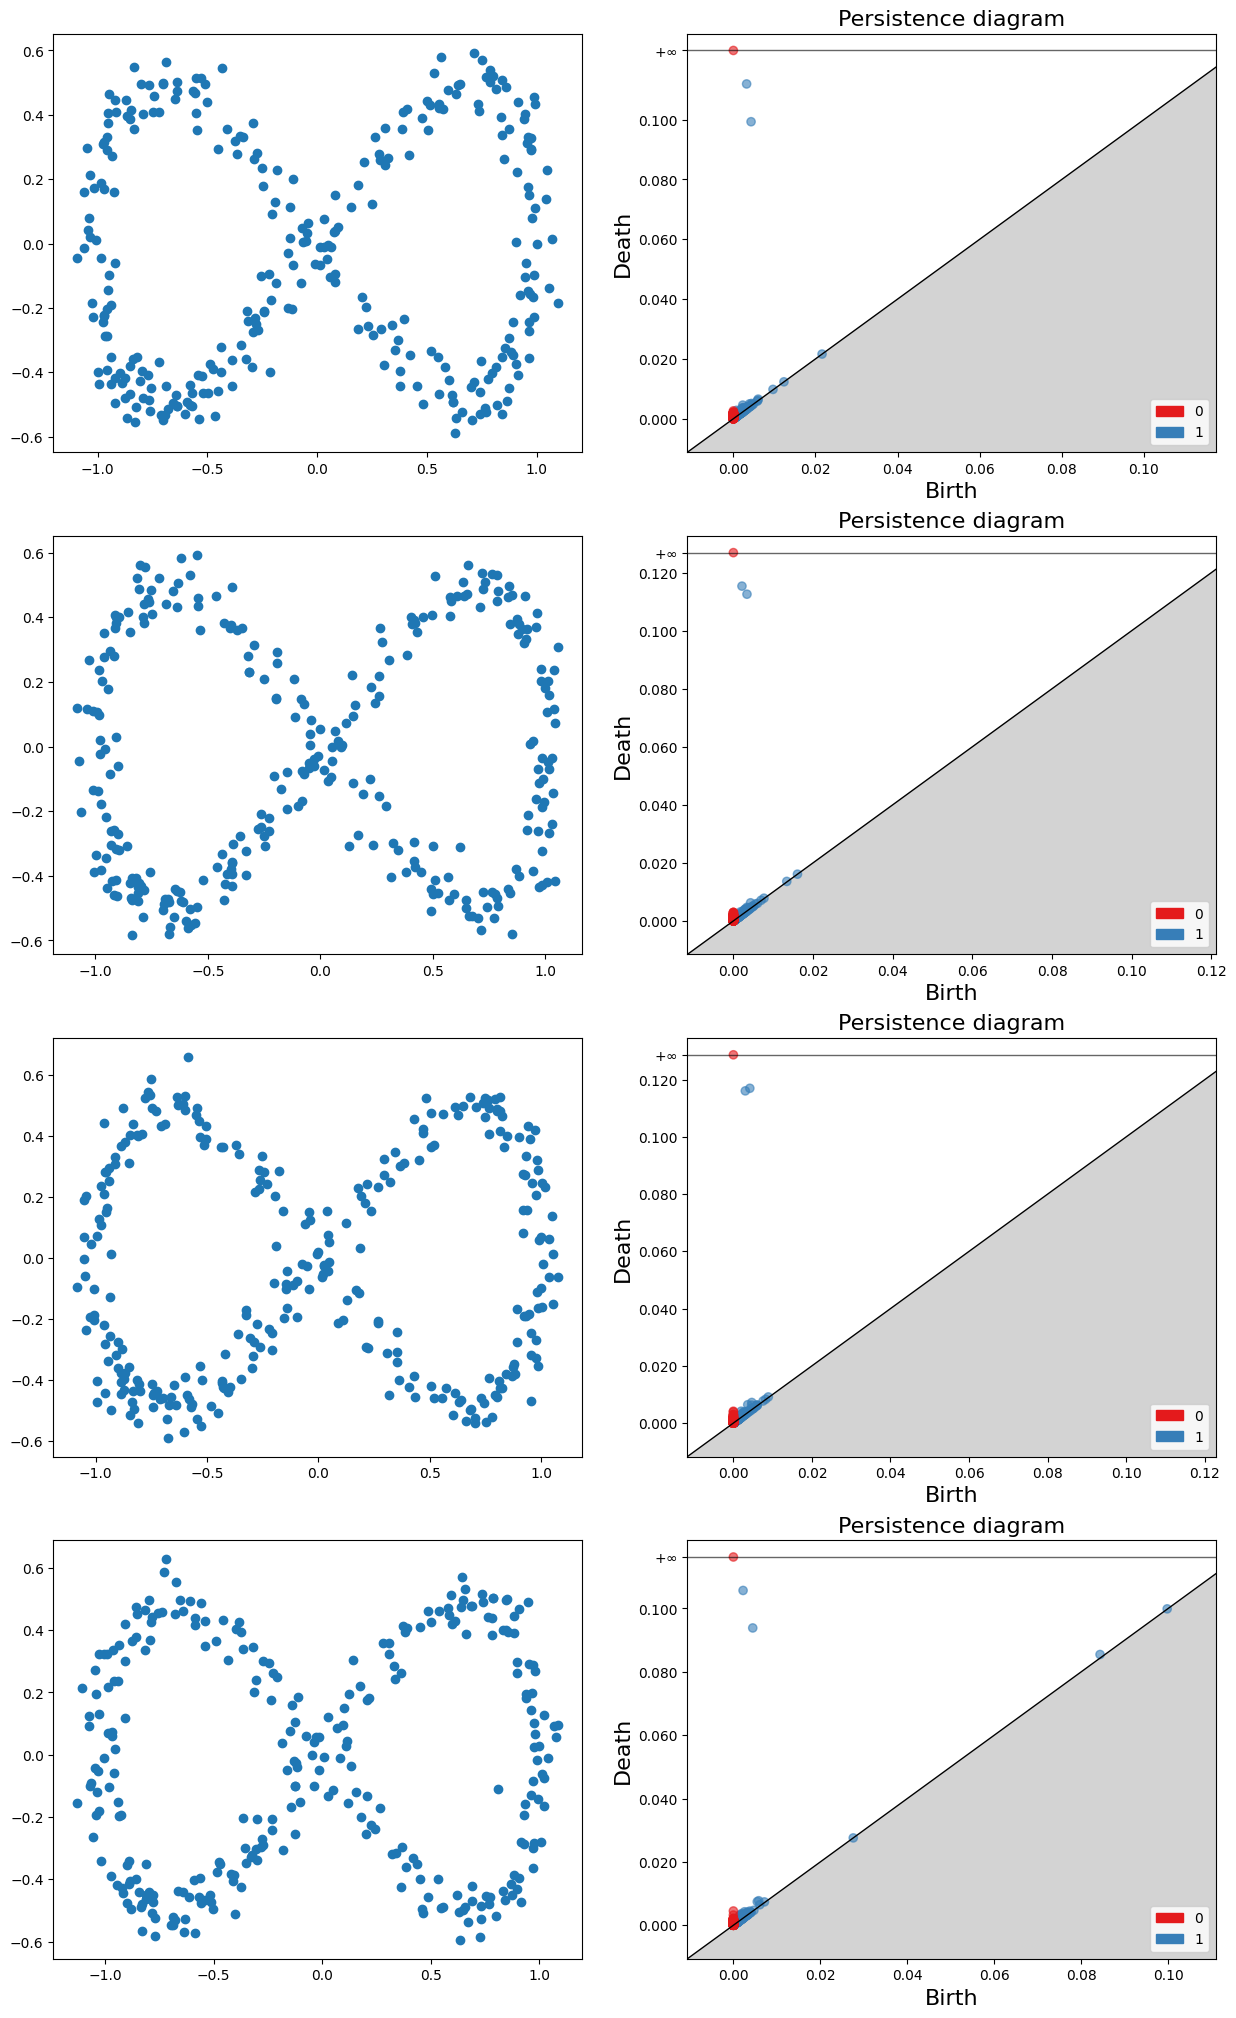

In [9]:
fig, ax = plt.subplots(4, 2, figsize=(15, 25))
for i in range(4):
    t = np.linspace(0, 2-5*np.pi, num_points)
    x = np.sin(t)
    y = np.sin(t)*np.cos(t)

    # Add some random noise to the points
    noise_factor = 0.05
    x += np.random.normal(0, noise_factor, num_points)
    y += np.random.normal(0, noise_factor, num_points)

    point_cloud = np.column_stack((x, y))
    alpha_complex = gd.AlphaComplex(points=point_cloud)
    simplex_tree = alpha_complex.create_simplex_tree()  
    dgm = simplex_tree.persistence()
    ax[i, 0].scatter(x, y)
    gd.plot_persistence_diagram(dgm, legend=True, axes=ax[i, 1])
    print(bottleneck_distance(dgm0, dgm))
    #gd.plot_persistence_barcode(dgm, legend=True, axes=ax[i, 2])

    

<Axes: title={'center': 'Persistence barcode'}>

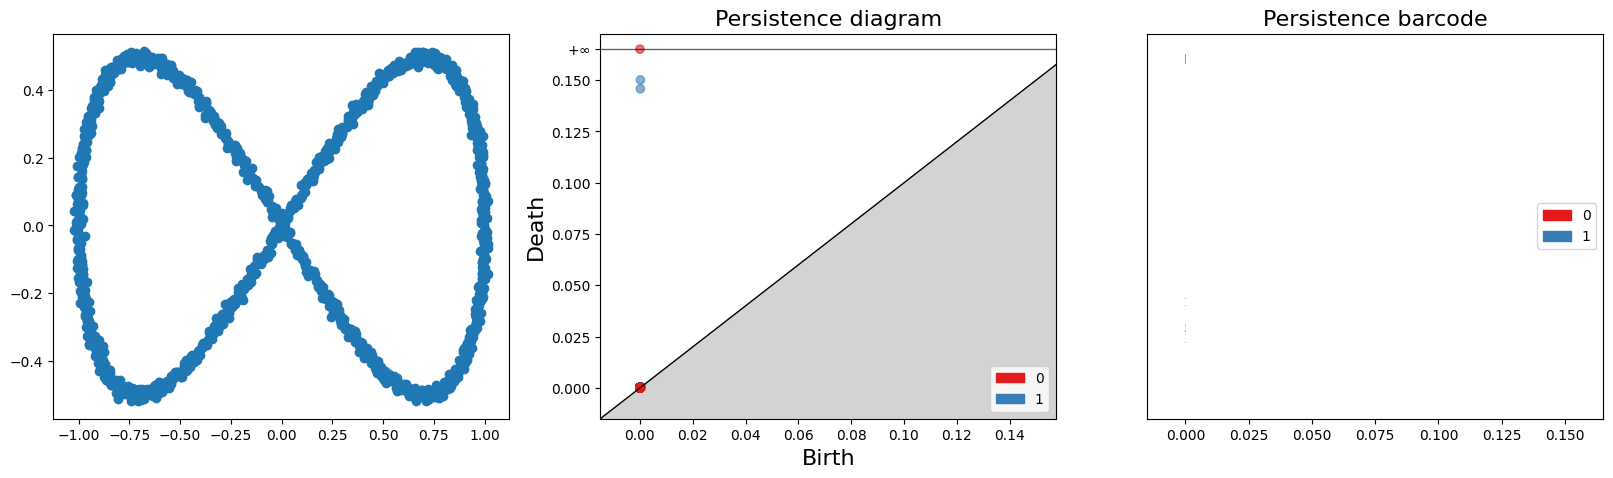

In [10]:
num_points = 1500

fig, ax = plt.subplots(1, 3, figsize=(20,5))

t = np.linspace(0, 2*np.pi, num_points)
x = np.sin(t)
y = np.sin(t)*np.cos(t)

# Add some random noise to the points
noise_factor = 0.01
x += np.random.normal(0, noise_factor, num_points)
y += np.random.normal(0, noise_factor, num_points)

point_cloud = np.column_stack((x, y))
alpha_complex = gd.AlphaComplex(points=point_cloud)
simplex_tree = alpha_complex.create_simplex_tree()  
dgm0 = simplex_tree.persistence()
ax[0].scatter(x, y)
gd.plot_persistence_diagram(dgm0, legend=True, axes=ax[1])
gd.plot_persistence_barcode(dgm0, legend=True, axes=ax[2])

<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

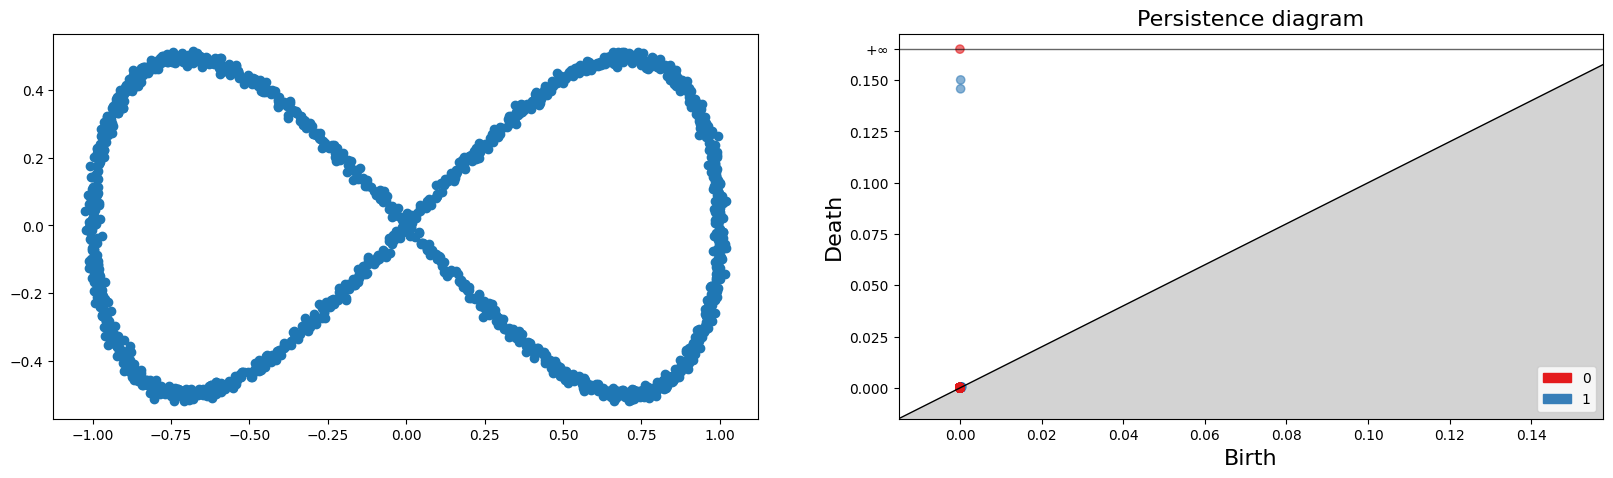

In [12]:
outliers = np.array([[0.0, 0.7], [0.4, 0.0], [0.75, 0.1]])
outliers2 = np.array([[0.0, 0.7], [0.4, 0.0]])#, [0.75, 0.1]])
outliers1 = np.array([[0.75, 0.1]])

outlier = outliers
point_cloud = np.append(np.column_stack((x, y)),outlier, axis=0)

point_cloud = np.column_stack((x, y))

fig, ax = plt.subplots(1, 2, figsize=(20,5))


alpha_complex = gd.AlphaComplex(points=point_cloud)
simplex_tree = alpha_complex.create_simplex_tree()
dgm1 = simplex_tree.persistence()
ax[0].scatter(point_cloud[:, 0], point_cloud[:, 1])
#ax[0].scatter(outlier[:, 0], outlier[:, 1], c='r')
gd.plot_persistence_diagram(dgm1, legend=True, axes=ax[1])



In [74]:
bottleneck_distance(dgm0, dgm1)

0.05731210059252897

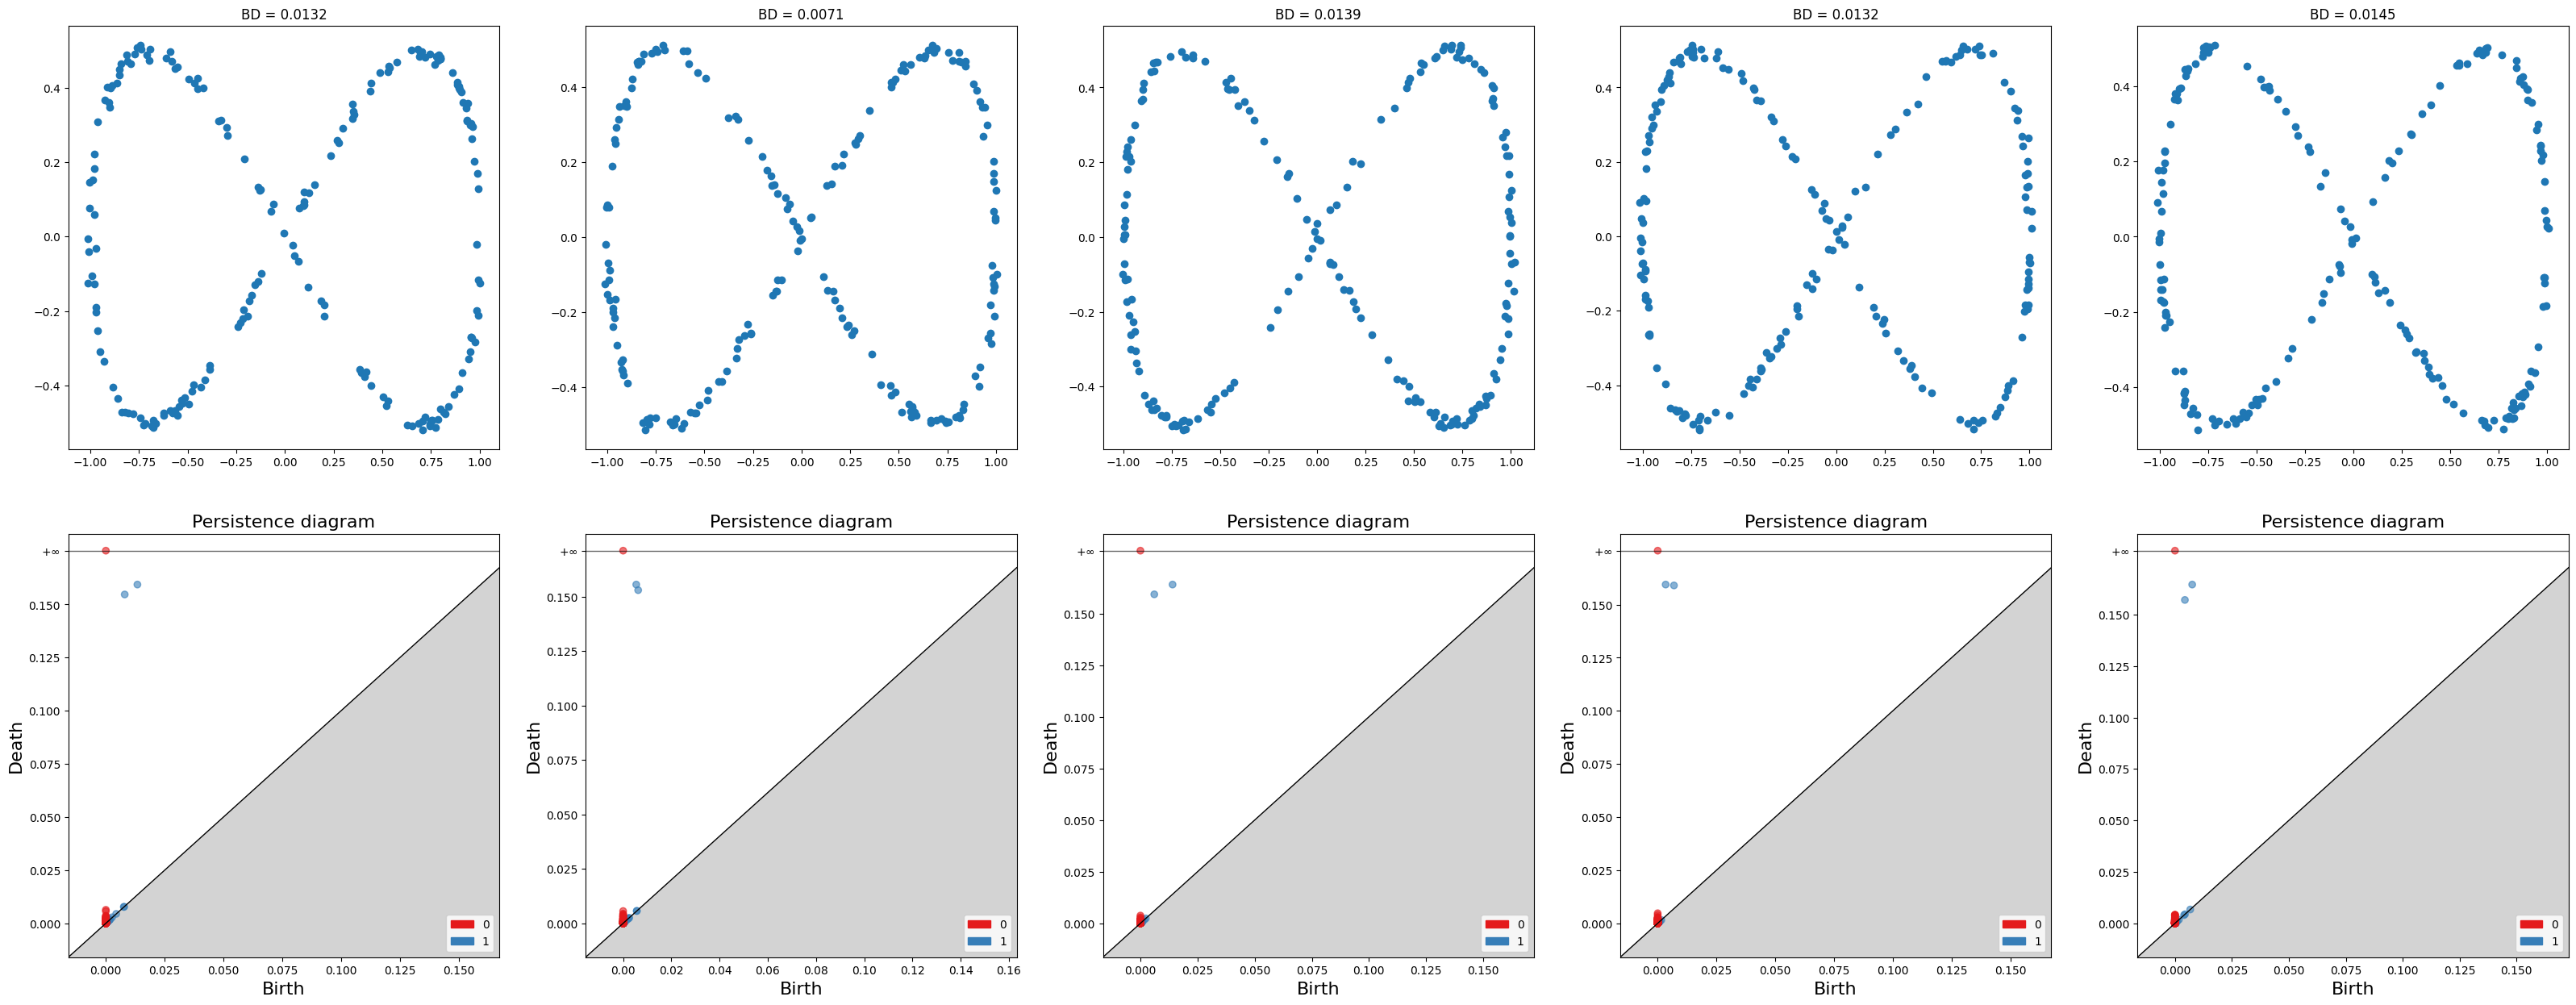

In [13]:
dgms = []

fig, ax = plt.subplots(2, 5, figsize=(40,15))


num_samples = 200
samples = 200


for i in range(samples):
    # sample 25 random from pointcloud
    indices = np.random.choice(point_cloud.shape[0], num_samples, replace=False)
    point_cloud_sample = point_cloud[indices]

    alpha_complex = gd.AlphaComplex(points=point_cloud_sample)
    simplex_tree = alpha_complex.create_simplex_tree()

    dgm = simplex_tree.persistence()
    dgms = dgms + [dgm]

    examples = np.array([0,0,0,0])

    x = samples // 5
    if i % x == 0:
        ax[0,i//x].scatter(point_cloud_sample[:, 0], point_cloud_sample[:, 1])
        gd.plot_persistence_diagram(dgm, legend=True, axes=ax[1,i//x])

        # check if outliers are in the sample
        for p in outliers:
            if p in point_cloud_sample:
                ax[0,i//x].scatter(p[0], p[1], color='r')

        ax[0,i//x].set_title(f"BD = {bottleneck_distance(dgm0, dgm):.4f}")

In [14]:


bd_vals = np.zeros((samples,samples))

for i in range(samples):
    for j in range(samples):
        bd_vals[i, j] = bottleneck_distance(dgms[i], dgms[j])

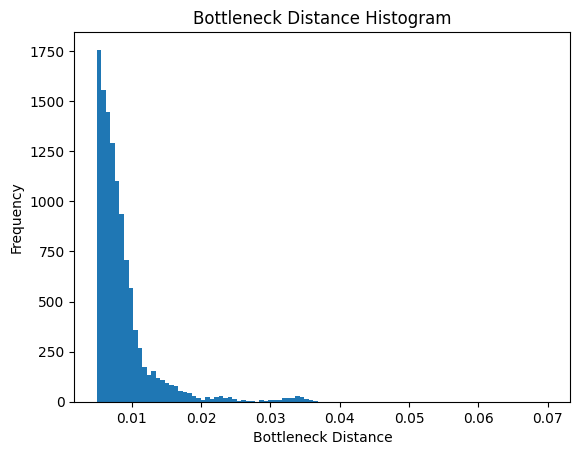

In [15]:
bd_vals2 = bd_vals[0]

# plt.imshow(bd_vals, cmap='hot', interpolation='nearest')
# plt.colorbar()
# plt.show()

bd_vals = np.triu(bd_vals, k=1)

# remove zeros

bd_vals = bd_vals[bd_vals != 0]

# frequency of bottleneck in percentage 
plt.hist(bd_vals.flatten(), bins=100, range=(0.005,0.07))
plt.title('Bottleneck Distance Histogram')
plt.xlabel('Bottleneck Distance')
plt.ylabel('Frequency')
plt.show()

(array([1.757e+03, 1.558e+03, 1.446e+03, 1.291e+03, 1.103e+03, 9.370e+02,
        7.060e+02, 5.660e+02, 3.580e+02, 2.690e+02, 1.710e+02, 1.330e+02,
        1.530e+02, 1.170e+02, 1.070e+02, 9.100e+01, 8.500e+01, 7.900e+01,
        5.400e+01, 5.000e+01, 4.200e+01, 3.100e+01, 1.900e+01, 1.100e+01,
        2.200e+01, 1.500e+01, 2.200e+01, 3.000e+01, 1.800e+01, 2.500e+01,
        1.200e+01, 5.000e+00, 8.000e+00, 3.000e+00, 5.000e+00, 1.000e+00,
        7.000e+00, 2.000e+00, 7.000e+00, 8.000e+00, 9.000e+00, 1.800e+01,
        1.900e+01, 1.900e+01, 2.800e+01, 2.600e+01, 1.200e+01, 9.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

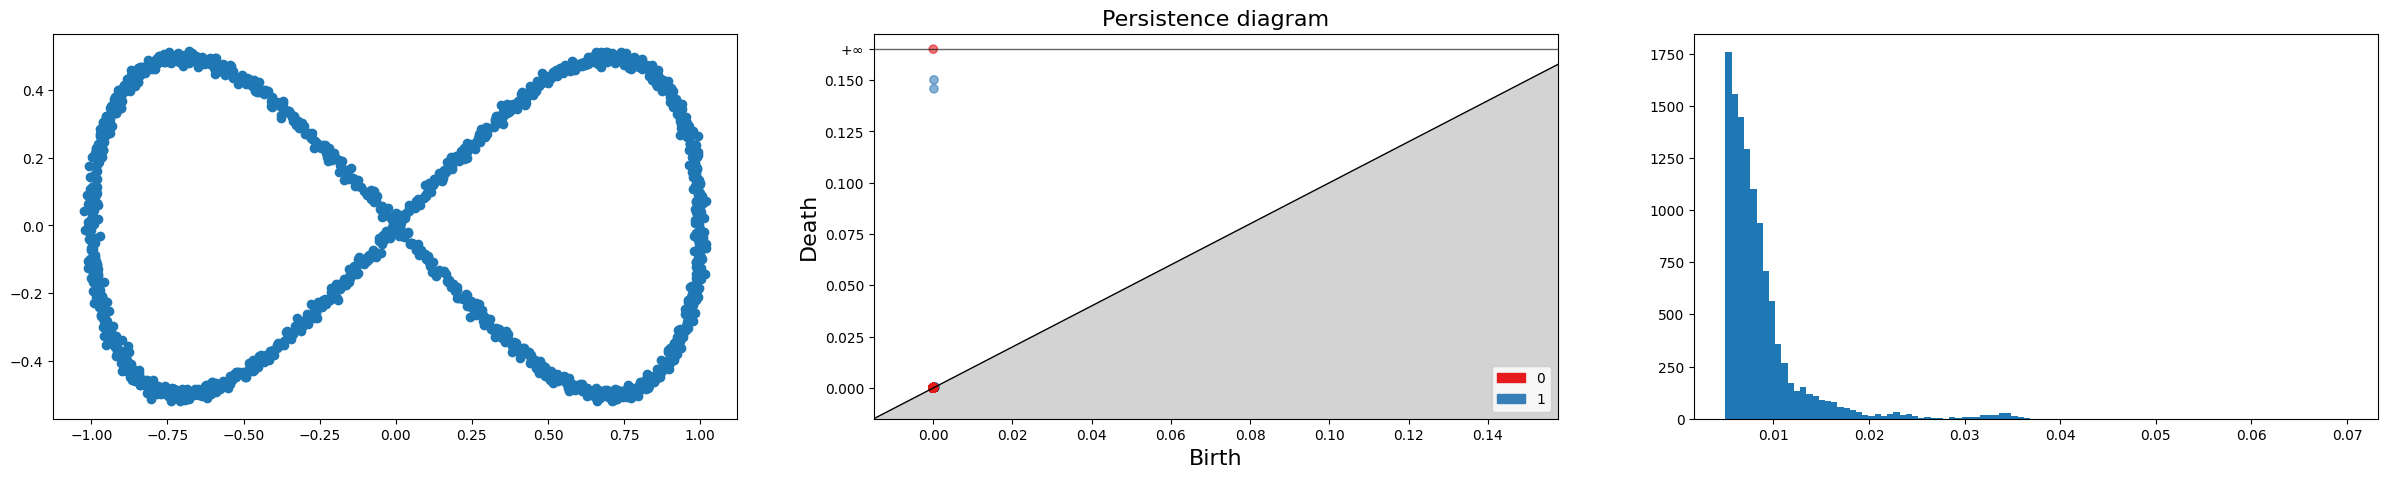

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(30,5))

ax[0].scatter(point_clouds[0][:, 0], point_cloud[:, 1])

gd.plot_persistence_diagram(dgm0, legend=True, axes=ax[1])

ax[2].hist(bd_vals.flatten(), bins=100, range=(0.005,0.07))

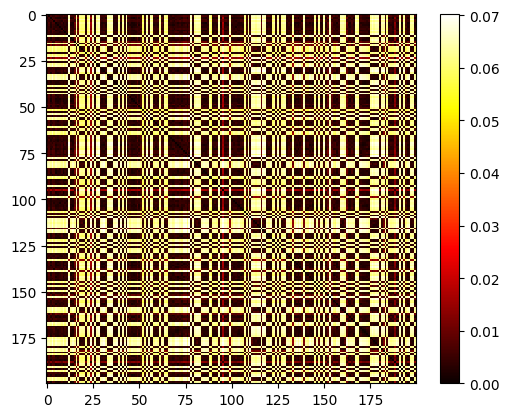

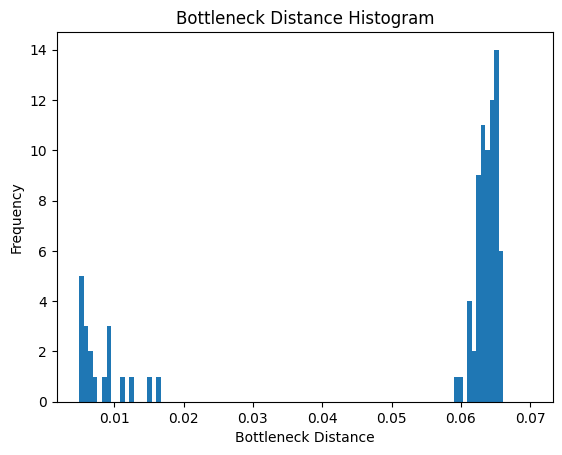

In [115]:
# plot the bottleneck distance as bar plot 


bd_vals1 = bd_vals[0]

plt.imshow(bd_vals, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()


# frequency of bottleneck in percentage 
plt.hist(bd_vals1, bins=100, range=(0.005,0.07))
plt.title('Bottleneck Distance Histogram')
plt.xlabel('Bottleneck Distance')
plt.ylabel('Frequency')
plt.show()

In [116]:
len(bd_vals1)

200

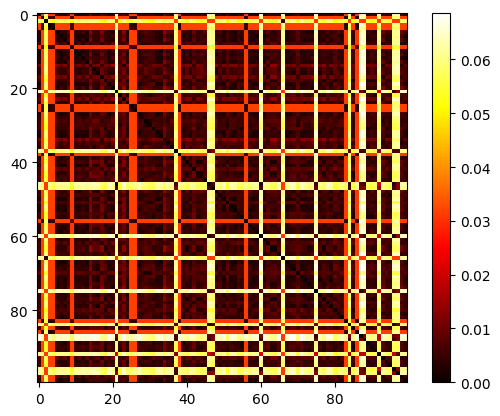

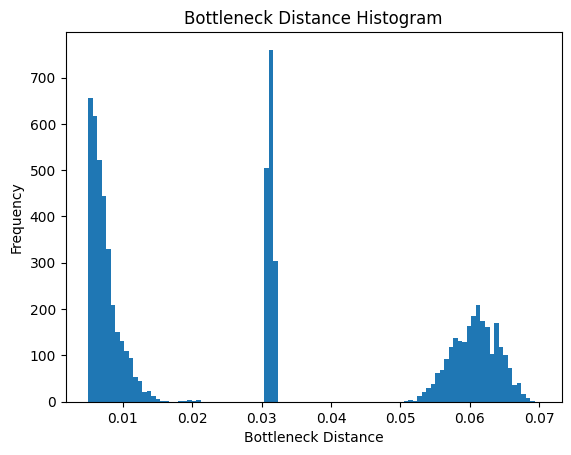

In [71]:
# plot the bottleneck distance as bar plot 

plt.imshow(bd_vals, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()


# frequency of bottleneck in percentage 
plt.hist(bd_vals.flatten(), bins=100, range=(0.005,0.07))
plt.title('Bottleneck Distance Histogram')
plt.xlabel('Bottleneck Distance')
plt.ylabel('Frequency')
plt.show()

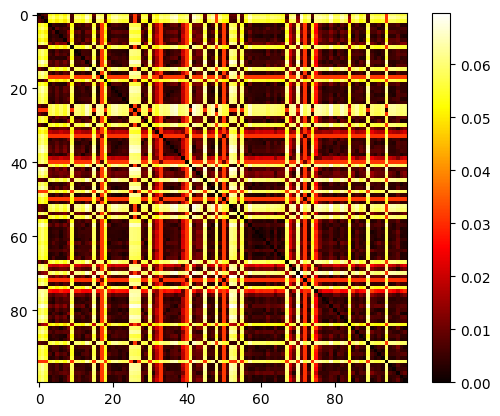

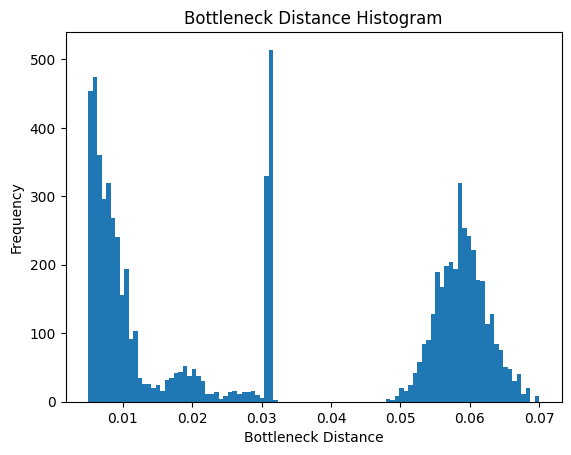

In [67]:
# plot the bottleneck distance as bar plot 

plt.imshow(bd_vals, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()


# frequency of bottleneck in percentage 
plt.hist(bd_vals.flatten(), bins=100, range=(0.005,0.07))
plt.title('Bottleneck Distance Histogram')
plt.xlabel('Bottleneck Distance')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Frequency')

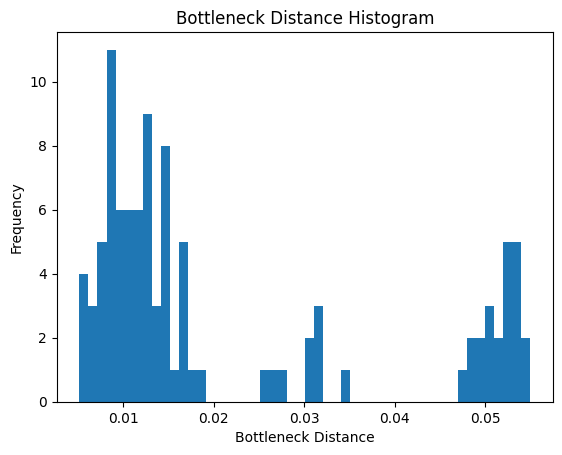

In [66]:
bds = np.zeros(len(dgms))
for i in range(len(dgms)):
    bds[i] = bottleneck_distance(dgm0, dgms[i])

plt.hist(bds, bins=50)
plt.title('Bottleneck Distance Histogram')
plt.xlabel('Bottleneck Distance')
plt.ylabel('Frequency')
    

In [156]:
1 - (300/302)**60

0.328789555570842

In [177]:
len(dgms)

200

In [111]:
from scipy.stats import hypergeom

# Total population size
N = 600

# Number of outliers
K = 1

# Sample size
n = 200

# Number of outliers in the sample (possible values: 1, 2, 3)
k_values = [1]

# Calculate the probability of each k
probabilities = [hypergeom.pmf(k, N, K, n) for k in k_values]

# Sum up the probabilities to get the odds
odds_of_including_outlier = sum(probabilities)

print("Odds of including an outlier:", odds_of_including_outlier)

Odds of including an outlier: 0.3333333333333333
